# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application.

## Background

This is a capstone project for Data Analytics Specialization course. The topic chosen for this specific project is webscrapping using BeautifulSoup. There will be a step-by-step process with some explanation from a template regarding data extraction from a website using BeautifulSoup as well as cleaning up of the data and then visualization. From the visualization, Some analysis or insight about it is then given after which a conclusion is then made from the plot. The case chosen here is the **Volume Data of Ethereum Sales** between *'Jan 1st 2020'* and *'June 30th 2021'* taken from the following url: https://www.coingecko.com/en/coins/ethereum/historical_data/usd?start_date=2020-01-01&end_date=2021-06-30#panel


## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [1]:
import requests

url_get = requests.get('https://www.coingecko.com/en/coins/ethereum/historical_data/usd?start_date=2020-01-01&end_date=2021-06-30#panel')

To visualize what exactly you get from the `request.get`, we can use .content to see what we exactly get. In the following, the array is sliced so it won't make the output full of the html we get from the page. You can delete the slicing if you want to see the complete output.

In [2]:
url_get.content[:500]

b'<!DOCTYPE html>\n<html lang="en">\n<head>\n<script async defer src="https://www.googleoptimize.com/optimize.js?id=GTM-W3CD992"></script>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1.0">\n<link rel="shortcut icon" href="/favicon.ico">\n<link type="application/opensearchdescription+xml" rel="search" href="/OpensearchDescription.xml" />\n<title>Ethereum USD Historical Data | CoinGecko</title>\n<meta name="de'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as a human can still be confused as to what and where we can use that piece of code, so here is where we use the BeautifulSoup. BeautifulSoup class will result in a BeautifulSoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make a BeautifulSoup object and feel free to explore the object here.

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

## Finding the Right Key to Scrap the Data & Extracting the Right Information

If you click on the link under **Background**, you will find a table with the following column names: *'Date'*, *'Market Cap'*, *'Volume'*, *'Open'*, and *'Close'*. The informations that we need are the *'Date'* and *'Volume'* columns which are contained in the table.

The first step to scrap data is to right-click on the table and then click on inspect element. This will open up an html code to the right, highlighting the line of code which affects the element on the webpage.

Next, we need to find the key or in this case the html tag which contains the table data. It should be close to the highlighted line when you first inspect the table. In this case, the tag `tbody` contains all the column data from the table. Thus, use `soup.find('tbody')` to get all the codes contained within these `tbody` tags.

In [4]:
table = soup.find('tbody')
print(table.prettify()[:500])

<tbody>
 <tr>
  <th class="font-semibold text-center" scope="row">
   2021-06-30
  </th>
  <td class="text-center">
   $253,607,549,372
  </td>
  <td class="text-center">
   $27,149,143,847
  </td>
  <td class="text-center">
   $2,169.40
  </td>
  <td class="text-center">
   N/A
  </td>
 </tr>
 <tr>
  <th class="font-semibold text-center" scope="row">
   2021-06-29
  </th>
  <td class="text-center">
   $243,040,539,437
  </td>
  <td class="text-center">
   $30,629,329,806
  </td>
  <td class="te


Finding row length.

In [5]:
row = table.find_all('th', attrs={'scope':'row', 'class':'font-semibold text-center'})
row_length = len(row)

Now that we know the number of rows, we can finally make a `for` loop to iterate the collecting and appending of data to a tuple. This is the scrapping process. 

First, we initialize an empty tuple and name it 'temp'. This is done so we have a container to append the data to in the `for` loop. Next, we start the for loop as written in the following cell block. Looking back the html code that we inspected, 'Date' and 'Volume' seems to have different keys. For 'Date', the key is the `th` tag with attributes as written in the following cell blocks. As for 'Volume', the key is the `td` tag with attributes as written in the following cell blocks. Next, since `.find_all()` function will return an array containing column data within html tags, to extract it one by one, we have to access it by the index `[i]`. There doesn't seem to be any trouble using this method to iterate the 'Date' column. But with the 'Volume' column, the `find_all()` on the `td` tag produces a set of data that is not only 'Volume'. Thus, the indexing for 'Volume' is made to be `[i+1+(i*3)]` since the 'Volume' data repeats on the second one in a four data dataset. Finally, `.append()` function is used to add the 'Date' and 'Volume' data to the tuple.

In [6]:
temp = [] #initiating a tuple

for i in range(0, row_length):

    #scrapping process
    #get Date
    date = table.find_all('th', attrs={'scope':'row', 'class':'font-semibold text-center'})[i].text
    
    #get Volume
    volume = table.find_all('td', attrs={'class': 'text-center'})[i+1+(i*3)].text
    
    temp.append((date, volume))
    
temp[:10] 

[('2021-06-30', '\n$27,149,143,847\n'),
 ('2021-06-29', '\n$30,629,329,806\n'),
 ('2021-06-28', '\n$24,316,408,028\n'),
 ('2021-06-27', '\n$24,249,510,321\n'),
 ('2021-06-26', '\n$25,981,381,067\n'),
 ('2021-06-25', '\n$22,447,489,242\n'),
 ('2021-06-24', '\n$28,098,744,045\n'),
 ('2021-06-23', '\n$38,755,019,937\n'),
 ('2021-06-22', '\n$39,499,960,408\n'),
 ('2021-06-21', '\n$26,235,850,447\n')]

In [7]:
temp = temp[::-1]

## Creating Data Frame & Data Wrangling

Put the array into dataframe.

In [8]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('Date', 'Volume'))
df.head()

,Date,Volume
0,2020-01-01,"\n$7,103,187,151\n"
1,2020-01-02,"\n$6,623,732,041\n"
2,2020-01-03,"\n$6,497,297,884\n"
3,2020-01-04,"\n$9,655,245,100\n"
4,2020-01-05,"\n$6,958,393,690\n"


**Data Wrangling:**

From the output of the previous cell, it is shown that the 'Volume' column had some unwanted text such as '\n', '$', and ','. From the output of the next cell, it is shown that the columns types are still incorrect. Thus, for 'Volume', the unneeded texts/strings are cleaned up using `.str.replace()` before changing the types into 'int64'. As for 'Date', the type is changed into 'datetime64'. Next, if the dataframe `df` is checked, it can be seen that it is still using the built-in indexing, thus we change it as well using `df.set_index()` using the column that is meant to be the index.

In [9]:
df.dtypes

Date      object
Volume    object
dtype: object

In [10]:
df['Date'] = df['Date'].astype('datetime64')
df['Volume'] = df['Volume'].str.replace("\n", "")
df['Volume'] = df['Volume'].str.replace("$", "")
df['Volume'] = df['Volume'].str.replace(",", "")
df['Volume'] = df['Volume'].astype('int64')

df.dtypes

C:\Users\mhmmd\AppData\Local\Temp\ipykernel_21092\2500474183.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Volume'] = df['Volume'].str.replace("$", "")


Date      datetime64[ns]
Volume             int64
dtype: object

In [11]:
df = df.set_index('Date')

**Data Visualisation:**

Since all cleaning up have been done, we can finally plot the dataframe. Here, we are going to use a line plot since from the data, we have only date and volume. From this kind of data, it is more likely used to monitor progression or trend. As for other kind of plots, it either doesn't answer the question/case or there is not enough data.

<AxesSubplot:xlabel='Date'>

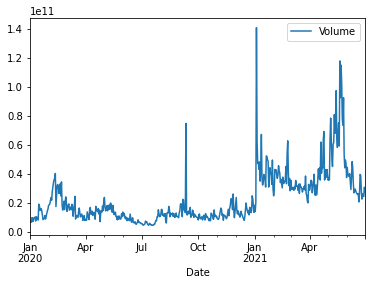

In [12]:
df.plot()

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing this Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

<AxesSubplot:xlabel='Date'>

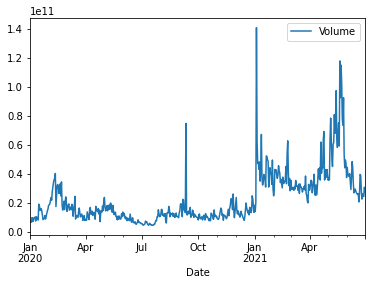

In [13]:
df.plot()

**Analysis:**

Before making an analysis we must first define what is 'Volume' in this case. 'Volume' here is the volume of cryptocurrency 'Ethereum' which means that it shows the amount of "transactions" made during a day. This can also mean that 'Ethereum' is active/popular or not.

The first insight that can be made just by looking at the plot is that in those time period, there is no 'Volume' with a value of zero. This could mean that in this time period, 'Ethereum' is not dead as in it is still being traded. The second insight that can be made is that there are two peaks that doesn't look like an outlier. The first peak being somewhere on February 2020 while the second peak being somewhere on May 2021. This could mean that for during those months there is something like an event which causes people to lean on trading 'Ethereum'. The third insight that can be made is that there are two peaks that is an outlier since the shape doesn't look like a mountain peak but just a straight line up. The first outlier peak occurred somewhere on September 2020 while the second outlier peak occurred somewhere on January 2021. This could mean that there is a false alarm as in someone falsely predicted a rise or a fall in cryptocurrency and thus causing a lot of transaction then. Another meaning could be that very few people correctly predicted a rise in price, thus since they have budget, they buy a lot of 'Ethereum' thus causing the spike on that day.

**Conclusion:**

History of Volume data as shown on the plot can be used to make some interesting insights on 'Ethereum'. Why history? This is because this notebook is written in the year 2022. Thus to use this data to make a decision on 'Ethereum' trading now can be pretty unreliable. In any case, the conclusion that can be made here is that perhaps we can matchup the date or months of peaks or outliers to find out if there is any event that causes such shape and maybe plan in advance if such event occurs in the future.

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.